Extracting audio from video

In [ ]:
import moviepy
from moviepy.editor import VideoFileClip
import librosa
import numpy as np

In [ ]:
vid_file = '/content/sample_data/01-01-01-01-01-01-02.mp4'
audio_file = '/content/sample_data/01-01-01-01-01-01-02.wav'

In [ ]:
video_clip = VideoFileClip(vid_file)

In [ ]:
audio_clip = video_clip.audio

In [ ]:
audio_clip.write_audiofile(audio_file)

MoviePy - Writing audio in /content/sample_data/01-01-01-01-01-01-02.wav


MoviePy - Done.


In [ ]:
audio_clip.close()
video_clip.close()

In [ ]:
audio_path = '/content/sample_data/01-01-01-01-01-01-02.wav'
x, sr = librosa.load(audio_path)

In [ ]:
sr = 22050
T = 5.0
t = np.linspace(0, T, int(T*sr),endpoint=False)
x = 0.5*np.sin(2*np.pi*220*t)

In [ ]:
import IPython.display as ipd
ipd.Audio(x,rate=sr)

Feature Extraction

In [ ]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
x, sr = librosa.load(audio_path)
ipd.Audio(x,rate=sr)

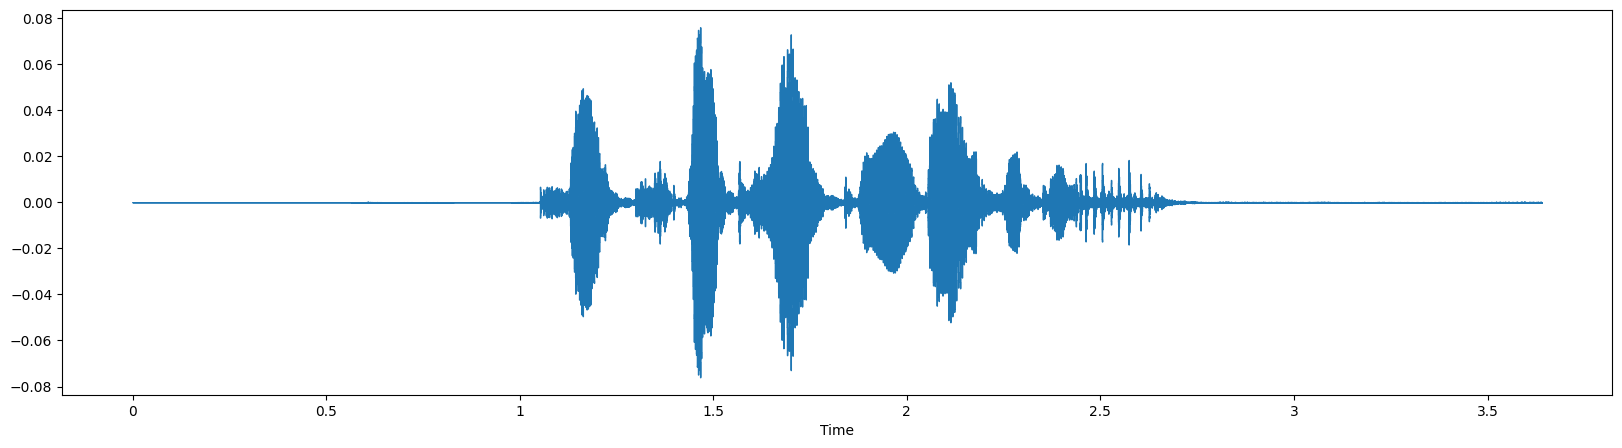

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(x, sr=sr)

Zero crossing

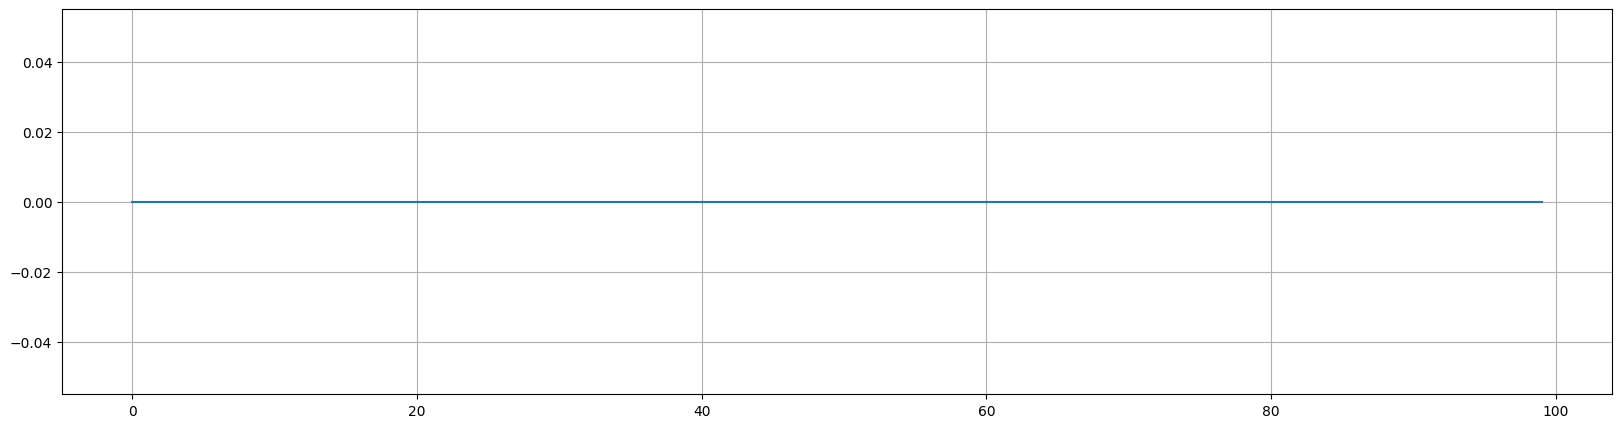

In [ ]:
# zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20,5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
# counting the zero crossings
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [ ]:
print(sum(zero_crossings))

0


In [ ]:
# Counting zero crossings for the entire signal

print(sum(librosa.zero_crossings(x, pad=False)))
librosa.zero_crossings(x, pad=False).shape

19296


(80262,)

Spectral centroid

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(157,)

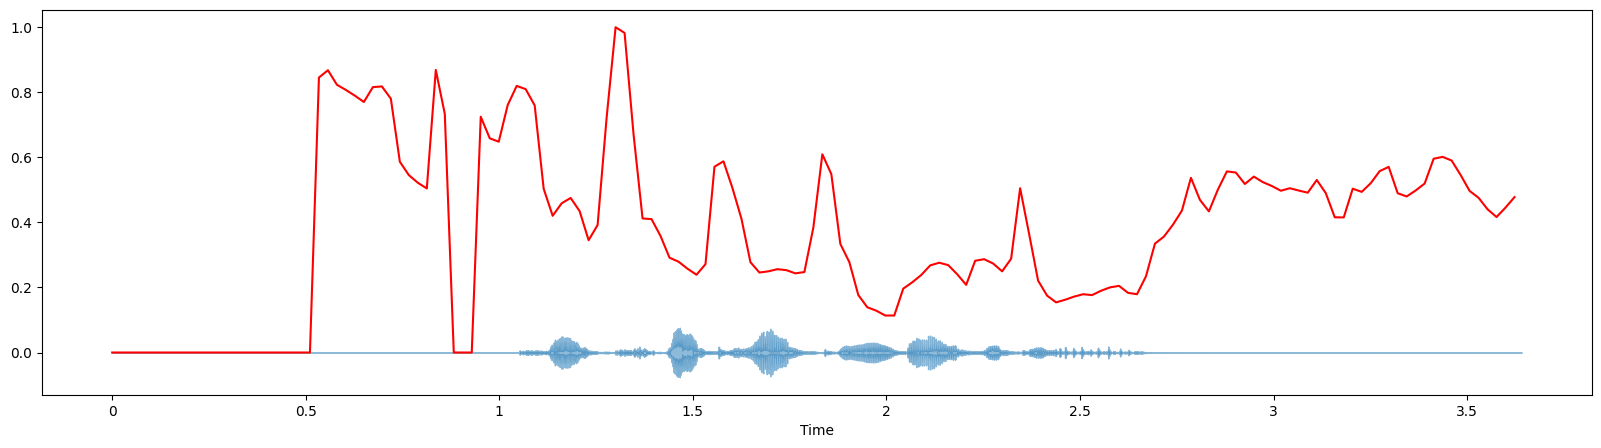

In [ ]:
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t,normalize(spectral_centroids), color='r')

Spectral rolloff

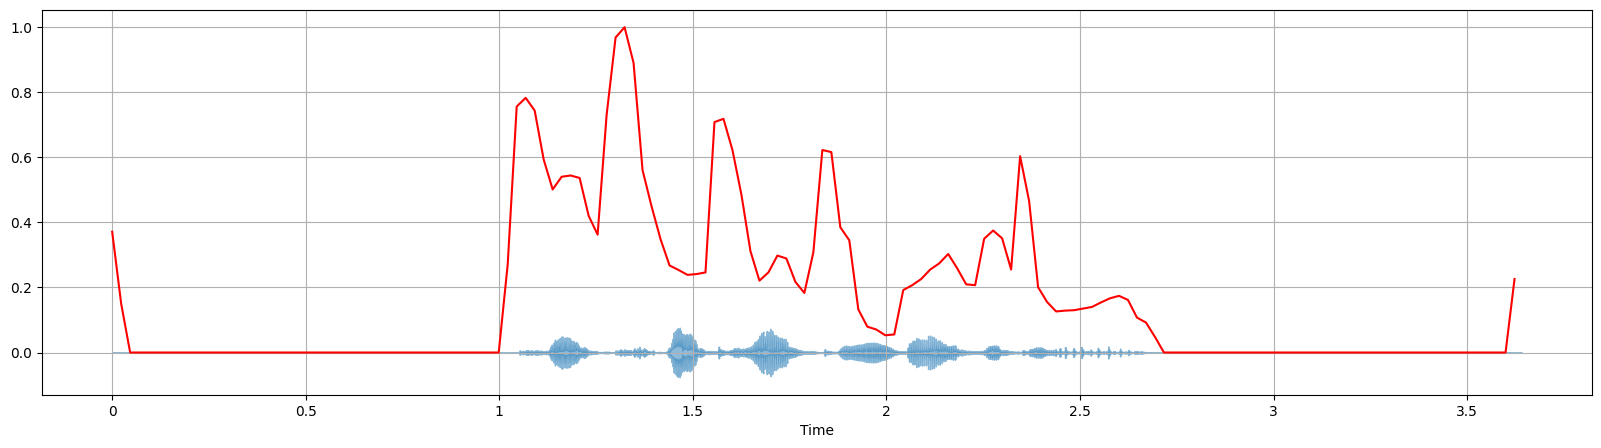

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

Spectral Bandwidth

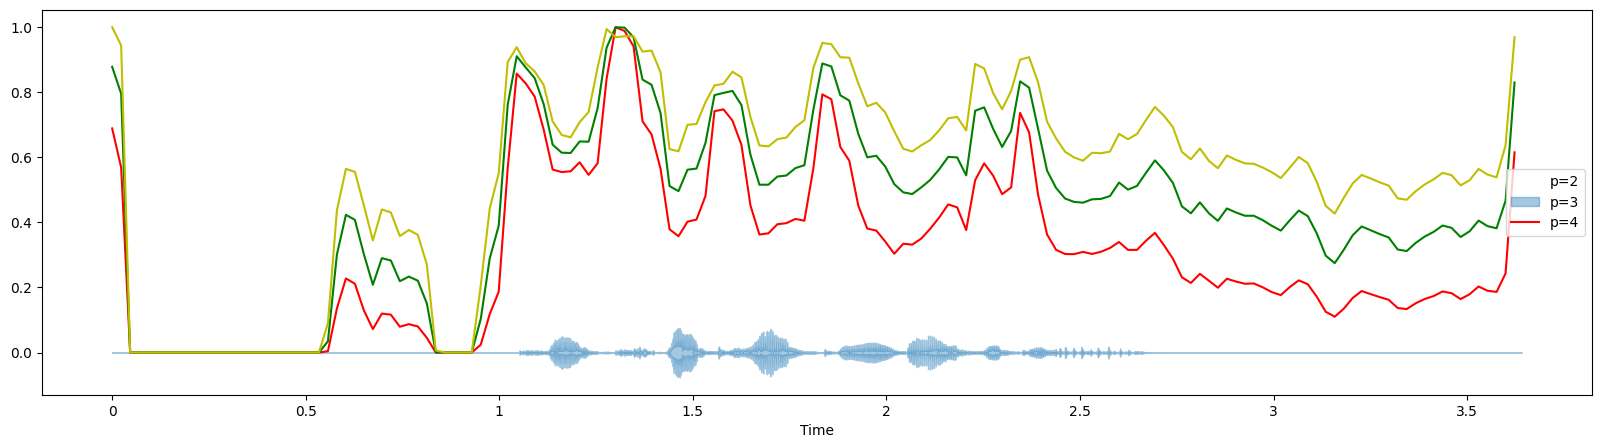

In [ ]:
plt.figure(figsize=(20,5))

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p=2', 'p=3', 'p=4'))

Spectral Contrast

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(y=x, sr=sr)
spectral_contrast.shape

(7, 157)

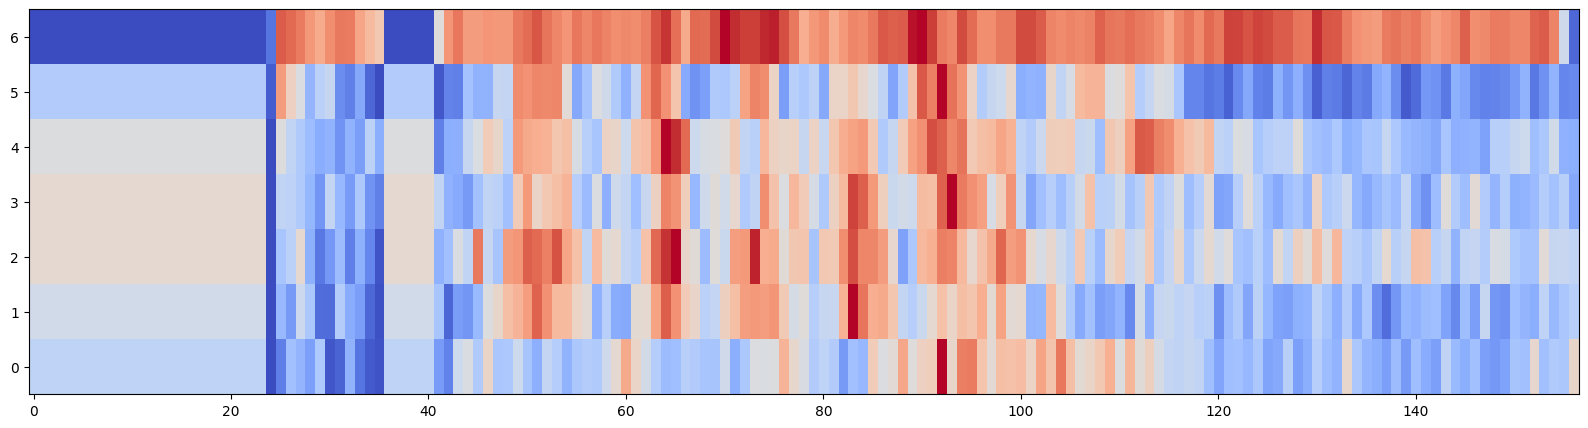

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

MFCC (Mel-Frequency Cepstral Coefficients)

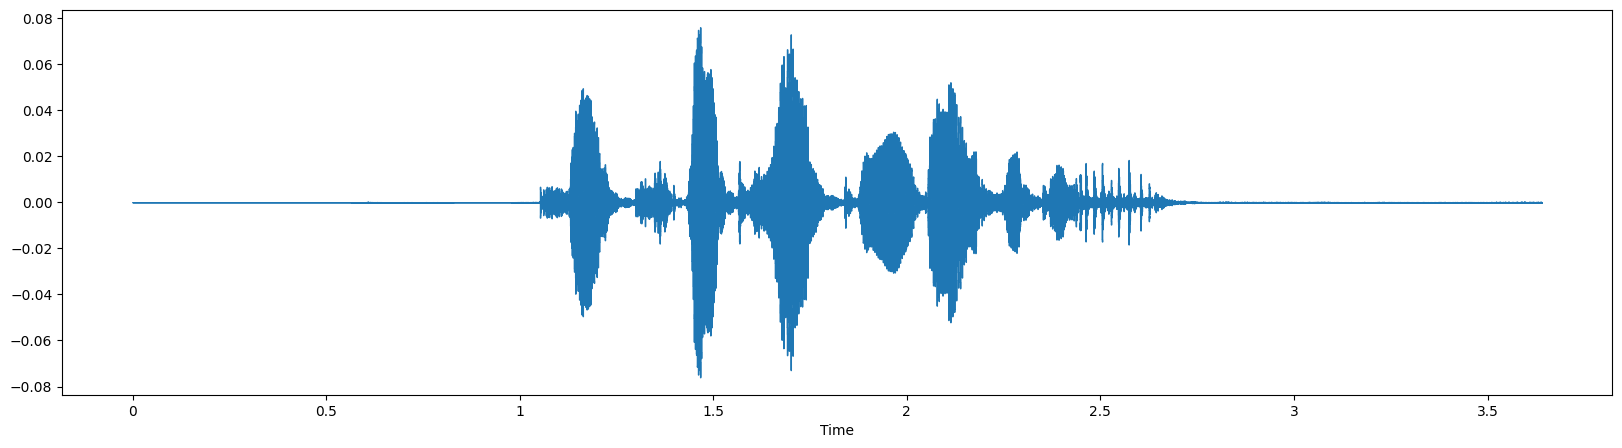

In [ ]:
plt.figure(figsize=(20,5))
x, sr = librosa.load(audio_path)
librosa.display.waveshow(x, sr=sr)

(20, 157)


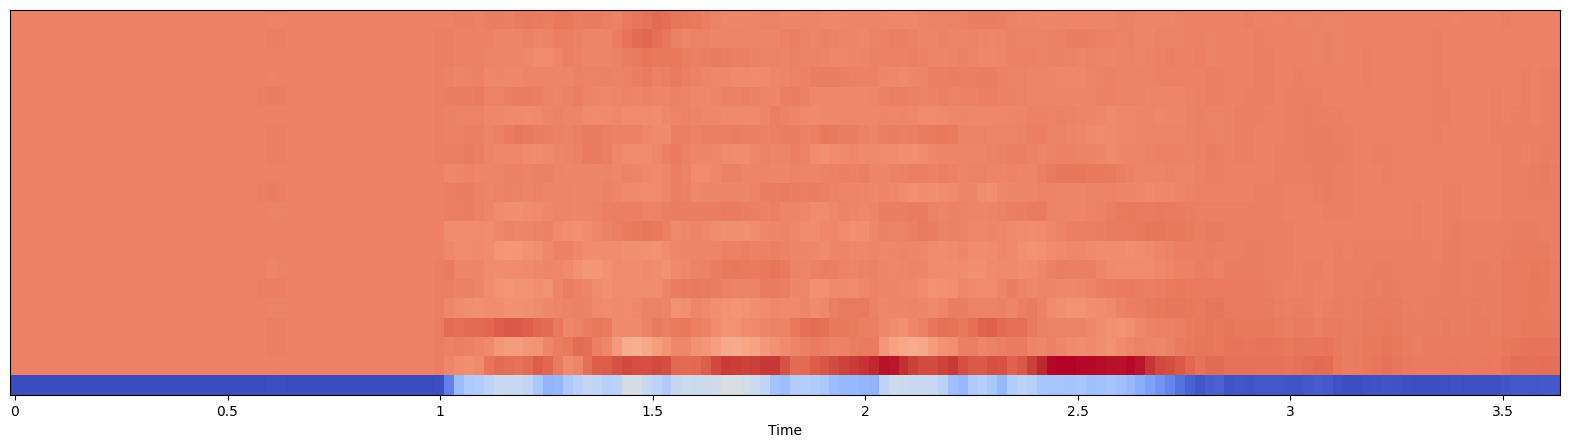

In [ ]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

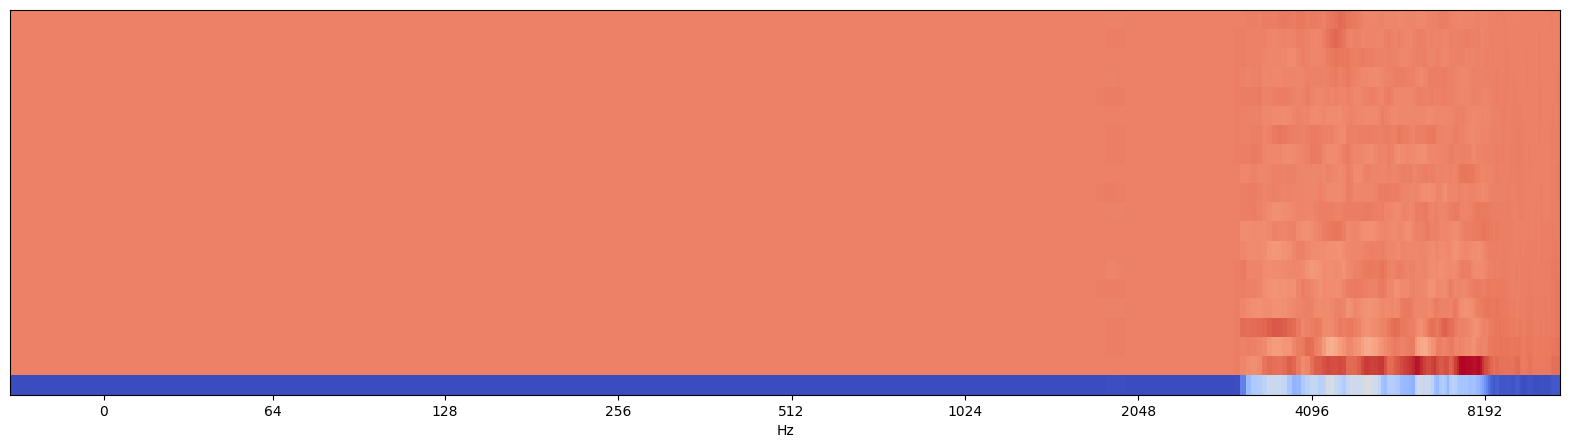

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

Feature Scaling

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.2148718e-08  2.4297435e-08 -3.0371794e-09 -9.1115382e-09
  0.0000000e+00  6.0743588e-09 -6.0743588e-09  1.2148718e-08
  3.0371794e-09 -6.0743588e-09 -3.0371794e-08  0.0000000e+00
 -6.0743588e-09  0.0000000e+00  6.0743588e-09 -1.2148718e-08
  6.0743588e-09  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[1.0000001 0.9999999 1.        0.9999998 1.0000002 1.        1.
 1.0000001 1.        1.0000001 0.9999999 1.        1.0000002 1.
 0.9999998 1.        0.9999999 1.        1.        1.       ]


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:277: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


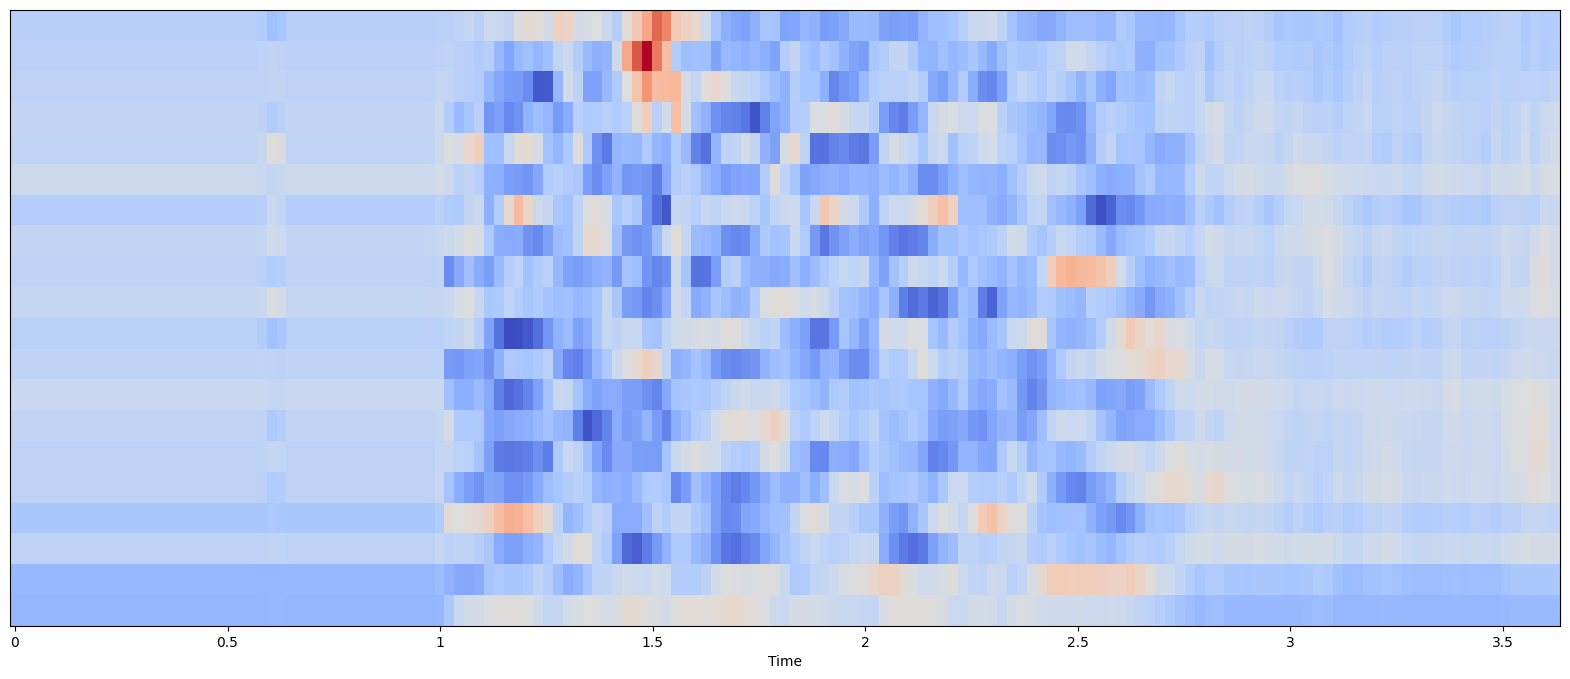

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

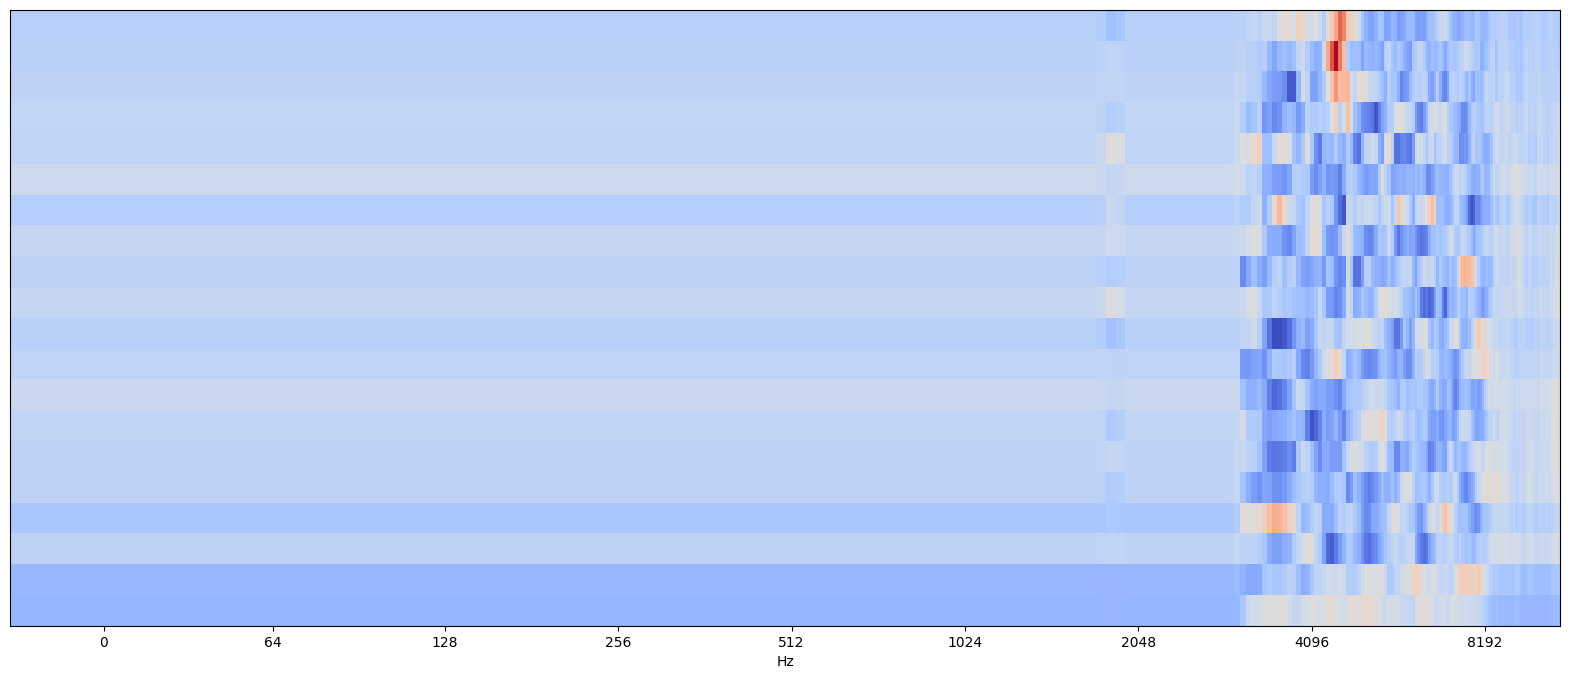

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

Chroma Frequencies

In [ ]:
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

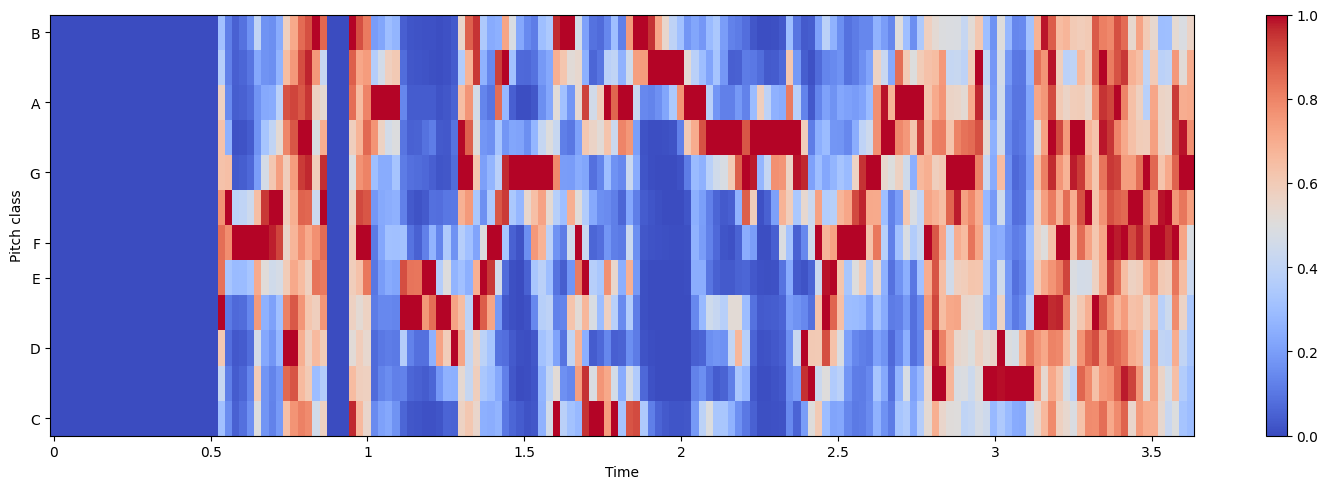

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

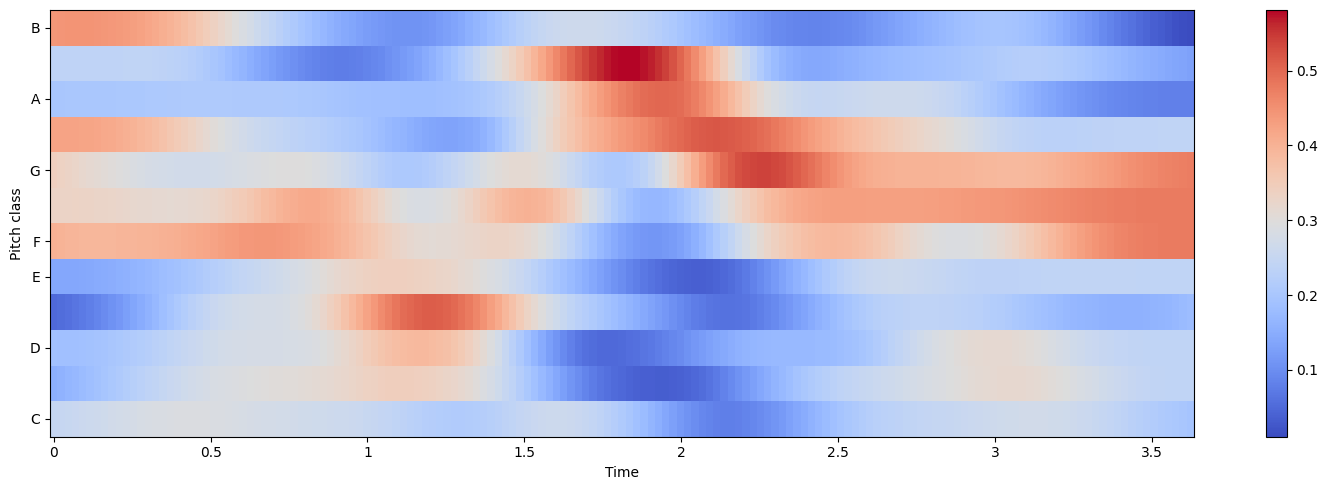

In [ ]:
# Using chroma energy distribution normalized statistics (CENS),
# typically used to identify similarity between different interpretations of the music given.

hop_length = 512
chromagram = librosa.feature.chroma_cens(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()